Objective: To analyze the flight 
booking dataset obtained from  
platform which is used to book flig t
tickets. A thorough study of the d ta
will aid in the discovery of valu ble
insights that will be of eno mous
value to passengers. Appl  EDA,
statistical methods and  achine
learning algorithms in orde  to get
meaningful information from it. from it.

In [1]:
#Importing Libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

In [2]:
#Reading Data

df = pd.read_csv("Flight_Booking.csv")
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


# Data Shaping

In [3]:
df.shape

(300153, 12)

In [5]:
#Removing unneccessary columns

df.drop("Unnamed: 0", axis = 1, inplace = True)
df

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [6]:
#Removing null values

df.dropna(inplace=True)
df.isna().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [8]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


# Data Visualization

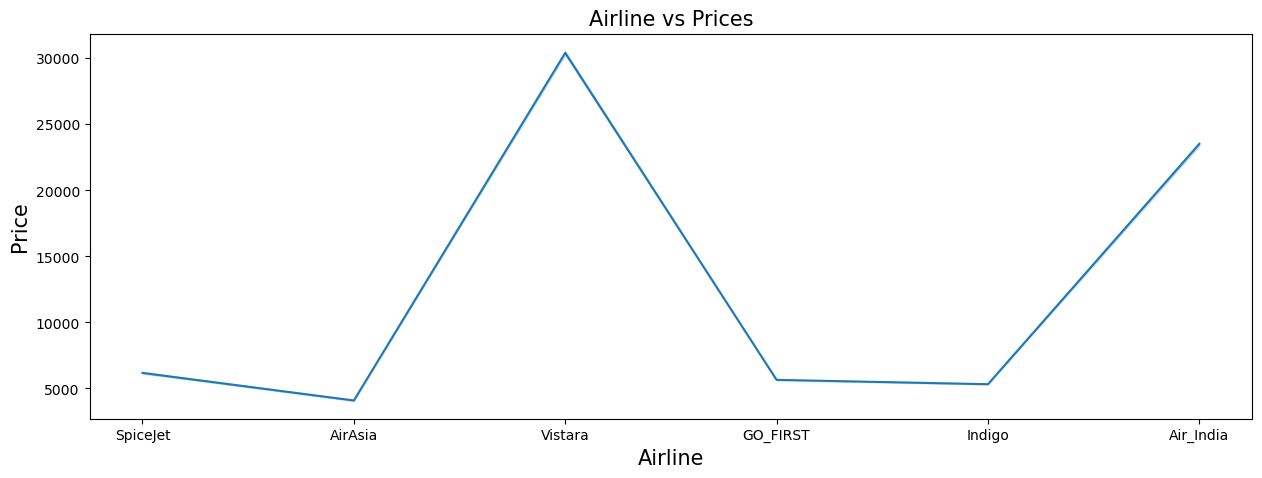

In [13]:
plt.figure(figsize = (15,5)) 
sns.lineplot(x = df['airline'], y = df['price'])
plt.title('Airline vs Prices', fontsize = 15)
plt.xlabel('Airline', fontsize = 15)
plt.ylabel('Price', fontsize = 15)
plt.show()

Graph shows the price variance for multiple airlines.

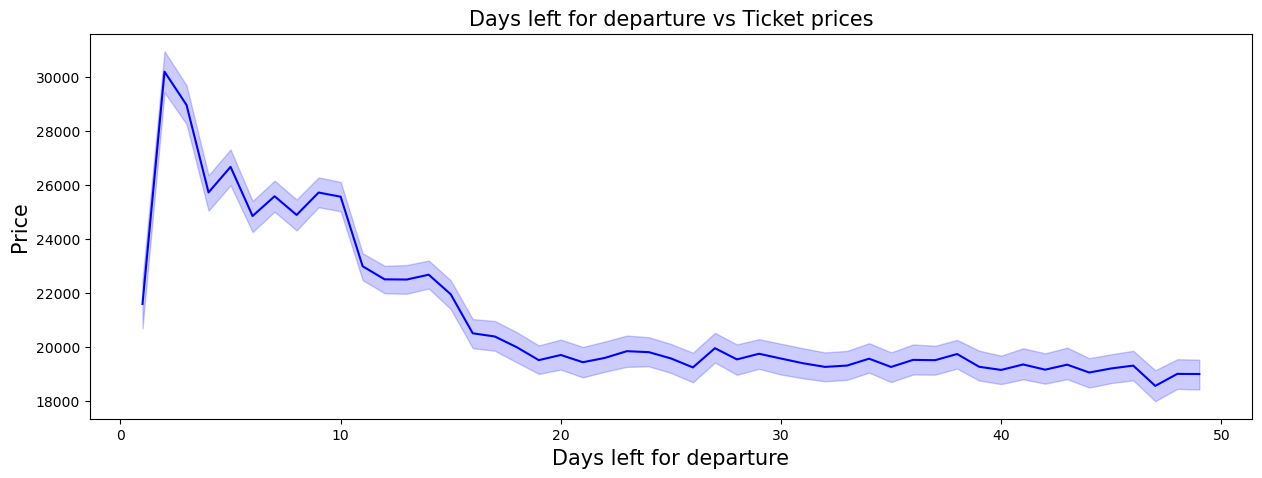

In [16]:
plt.figure(figsize = (15,5)) 
sns.lineplot(x = df['days_left'], y = df['price'], color = 'blue')
plt.title('Days left for departure vs Ticket prices', fontsize = 15)
plt.xlabel('Days left for departure', fontsize = 15)
plt.ylabel('Price', fontsize = 15)
plt.show()

Graph shows that the prices increases with decrease in the number of days left for a flight to depart.

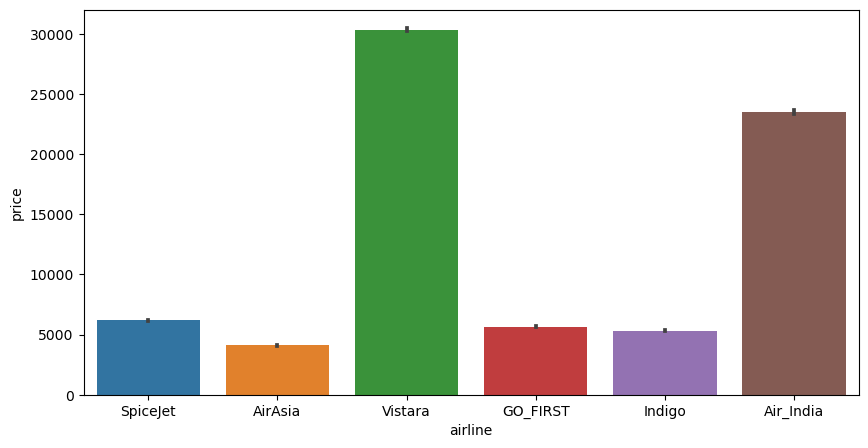

In [18]:
plt.figure(figsize = (10,5))
sns.barplot(x = df['airline'], y = df['price'])
plt.show()

Graph shows the price range for each airline.

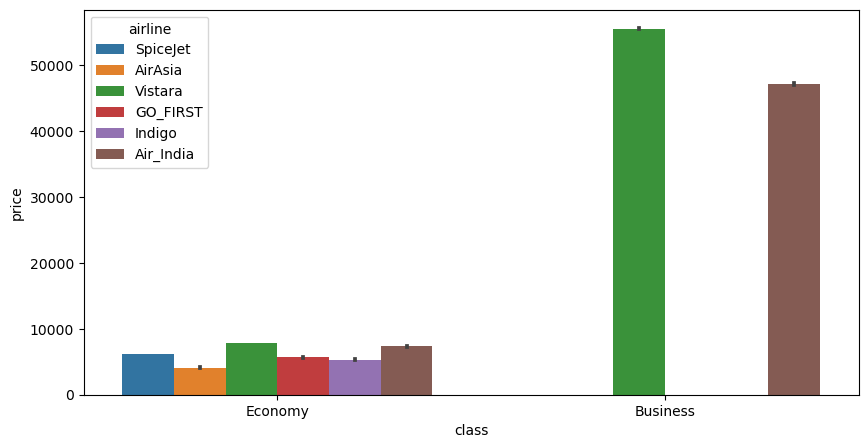

In [19]:
plt.figure(figsize = (10,5))
sns.barplot(x = df['class'], y = df['price'], hue = df['airline'])
plt.show()

Graph shows the price range for all the classes of each airline.

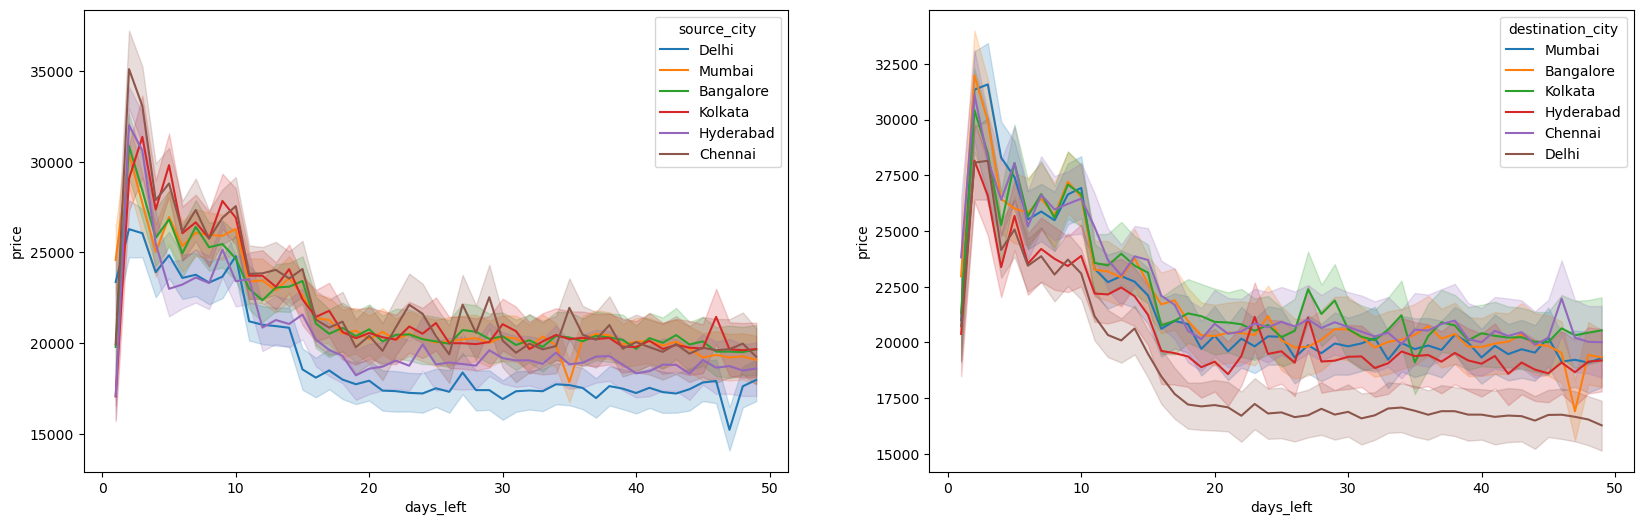

In [22]:
fig,ax = plt.subplots(1,2, figsize = (20,6))

sns.lineplot(x = df['days_left'], y = df['price'], hue = df['source_city'], ax = ax[0])
sns.lineplot(x = df['days_left'], y = df['price'], hue = df['destination_city'], ax = ax[1])
plt.show()

Graph shows the price variance of airlines depending on the number of days left for departure from both, Source & Destination point of view.

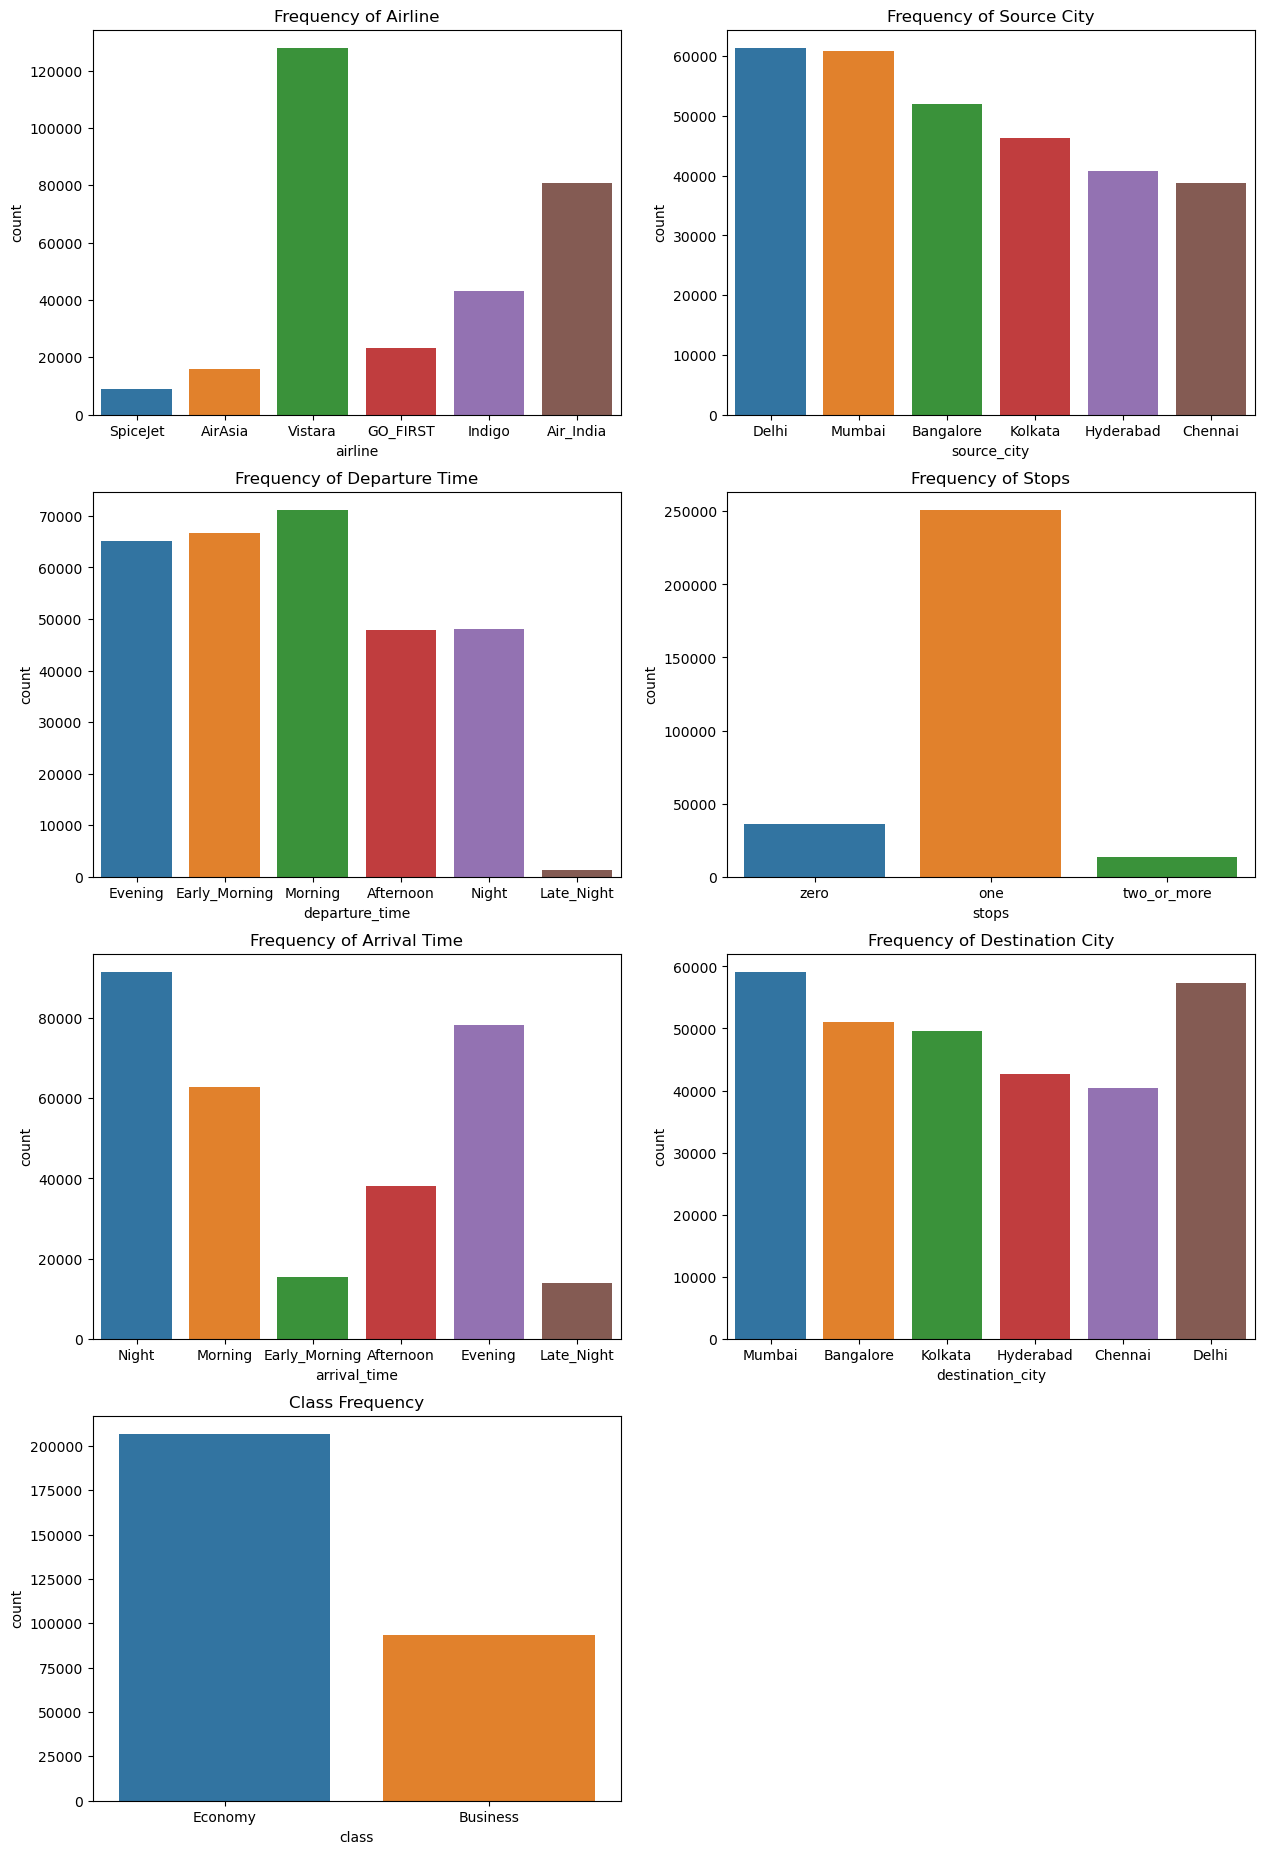

In [25]:
plt.figure(figsize=(15,23))

plt.subplot(4, 2, 1)
sns.countplot(x=df["airline"], data=df) 
plt.title("Frequency of Airline")

plt.subplot(4, 2, 2)
sns.countplot(x=df["source_city"], data=df) 
plt.title("Frequency of Source City")

plt.subplot(4, 2, 3)
sns.countplot(x=df["departure_time"], data=df) 
plt.title("Frequency of Departure Time")

plt.subplot(4, 2, 4)
sns.countplot(x=df["stops"], data=df) 
plt.title("Frequency of Stops")

plt.subplot(4, 2, 5)
sns.countplot(x=df["arrival_time"], data=df) 
plt.title("Frequency of Arrival Time")

plt.subplot(4, 2, 6)
sns.countplot(x=df["destination_city"], data=df) 
plt.title("Frequency of Destination City")

plt.subplot(4, 2, 7)
sns.countplot(x=df["class"], data=df) 
plt.title("Class Frequency")

plt.show()

Graphs shows the plots between the categorical values in the data. 

In [33]:
for i in df.columns:
    if df[i].dtype == 'object':
        print (i)

airline
flight
source_city
departure_time
stops
arrival_time
destination_city
class


In [34]:
# Now Performing Label Encoding for the categorical features.

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['airline'] = le.fit_transform(df['airline'])
df['source_city'] = le.fit_transform(df['source_city'])
df['departure_time'] = le.fit_transform(df['departure_time'])
df['stops'] = le.fit_transform(df['stops'])
df['arrival_time'] = le.fit_transform(df['arrival_time'])
df['destination_city'] = le.fit_transform(df['destination_city'])
df['class'] = le.fit_transform(df['class'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  int32  
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  int32  
 3   departure_time    300153 non-null  int32  
 4   stops             300153 non-null  int32  
 5   arrival_time      300153 non-null  int32  
 6   destination_city  300153 non-null  int32  
 7   class             300153 non-null  int32  
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int32(7), int64(2), object(1)
memory usage: 17.2+ MB


## Feature Selection

In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

a = []

for i in df.columns:
    if ((df[i].dtype != 'object') & (i != 'price')):
        a.append(i)

x = df[a]
vif_df = pd.DataFrame()
vif_df['feature'] = x.columns
vif_df['VIF'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]

vif_df

,feature,VIF
0,airline,3.393124
1,source_city,2.927766
2,departure_time,2.779427
3,stops,1.426614
4,arrival_time,3.684550
5,destination_city,2.885337
6,class,2.849370
7,duration,4.113876
8,days_left,3.976790


VIF should be less than 5. As all the value are above 5, no columns drops needed.e

## Implementing Linear Regression model

Applying standardization and implementing Linear Regression Model to
predict the price of a flight.

In [73]:
x = df.drop(columns=['price', 'flight'], axis = 1)
y = df['price']

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.3, random_state = 11)

In [74]:
x_train.shape,y_train.shape

((210107, 9), (210107,))

In [76]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [77]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

y_pred = lr.predict(x_test)
y_pred

array([ 1625.19735529,  6243.22862437,  -479.74496935, ...,
       56159.77014099, 49862.51845774, 49419.84476313])

In [78]:
diff = pd.DataFrame(np.c_[y_test,y_pred], columns = ['Actual value', 'Predicted Value'])
diff

,Actual value,Predicted Value
0,4589.0,1625.197355
1,5176.0,6243.228624
2,2456.0,-479.744969
3,3096.0,882.214619
4,71058.0,52277.069804
...,...,...
90041,53209.0,48269.227846
90042,51697.0,56347.208994
90043,60160.0,56159.770141
90044,49553.0,49862.518458


In [81]:
from sklearn.metrics import r2_score, mean_absolute_percentage_error, mean_squared_error, mean_absolute_error

print('R2 score: ', r2_score(y_test,y_pred))

mean_abs_error = mean_absolute_error(y_test,y_pred)
print('Mean Absolute error: ',mean_abs_error)

print('Mean Absolute Percentage error: ',mean_absolute_percentage_error(y_test,y_pred))

mse = mean_squared_error(y_test,y_pred)
print('Mean Squared Error: ',mse)

rmse = np.sqrt(mse)
print('Root Mean Squared error: ',rmse)

R2 score:  0.9048391665037163
Mean Absolute error:  4640.686025459065
Mean Absolute Percentage error:  0.43465206527720096
Mean Squared Error:  49373512.11832064
Root Mean Squared error:  7026.628787570939


Root Mean square error(RMSE) 
of the Linear regression model is7026.633 and Mean absolute percentag 
error(MAPE) i43.4634 percent. Lower the RMSE and MA,PE betteis r the model.

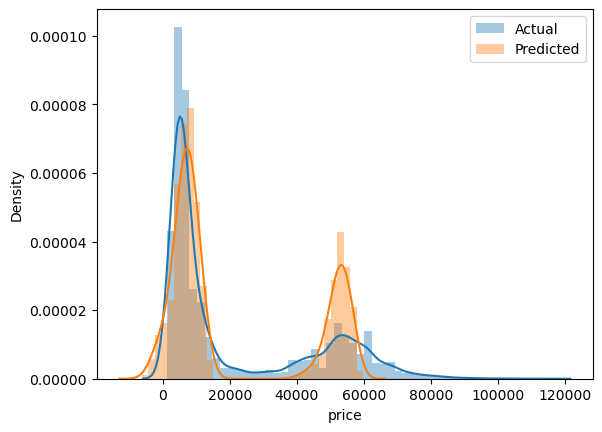

In [82]:
sns.distplot(y_test, label = 'Actual')
sns.distplot(y_pred, label = 'Predicted')
plt.legend()

## Implementing Decision Tree regressor

In [86]:
from sklearn.tree import DecisionTreeRegressor

dr = DecisionTreeRegressor()
dr.fit(x_train,y_train)

y_pred = dr.predict(x_test)

print('R2 score: ', r2_score(y_test,y_pred))

mean_abs_error = mean_absolute_error(y_test,y_pred)
print('Mean Absolute error: ',mean_abs_error)

print('Mean Absolute Percentage error: ',mean_absolute_percentage_error(y_test,y_pred))

mse = mean_squared_error(y_test,y_pred)
print('Mean Squared Error: ',mse)

rmse = np.sqrt(mse)
print('Root Mean Squared error: ',rmse)

R2 score:  0.9765736280113302
Mean Absolute error:  1178.947199209293
Mean Absolute Percentage error:  0.07570237529969302
Mean Squared Error:  12154604.145160684
Root Mean Squared error:  3486.345385236621


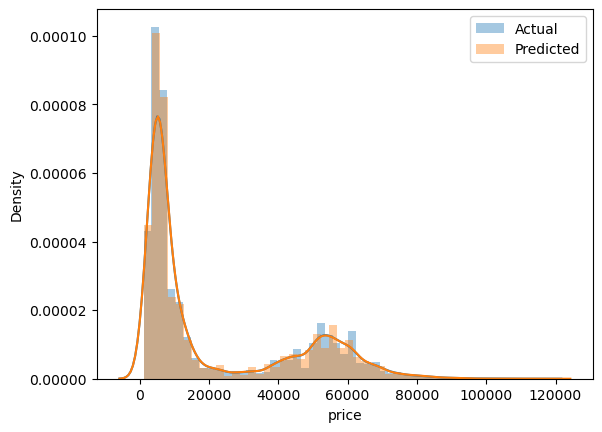

In [87]:
sns.distplot(y_test, label = 'Actual')
sns.distplot(y_pred, label = 'Predicted')
plt.legend()

## Implementing Random Forest regressor

In [84]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)

y_pred = rfr.predict(x_test)

print('R2 score: ', r2_score(y_test,y_pred))

mean_abs_error = mean_absolute_error(y_test,y_pred)
print('Mean Absolute error: ',mean_abs_error)

print('Mean Absolute Percentage error: ',mean_absolute_percentage_error(y_test,y_pred))

mse = mean_squared_error(y_test,y_pred)
print('Mean Squared Error: ',mse)

rmse = np.sqrt(mse)
print('Root Mean Squared error: ',rmse)

R2 score:  0.9850102852179786
Mean Absolute error:  1104.6796744520334
Mean Absolute Percentage error:  0.07212837594233357
Mean Squared Error:  7777305.402324039
Root Mean Squared error:  2788.7820643291648


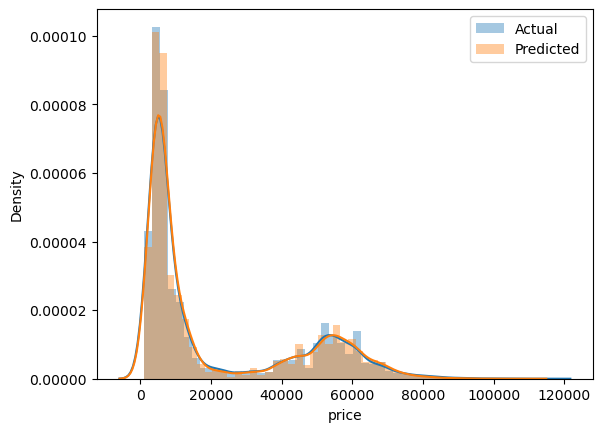

In [85]:
sns.distplot(y_test, label = 'Actual')
sns.distplot(y_pred, label = 'Predicted')
plt.legend()